# GroupProject - ML Regression Model Notebook

This notebook looks at a ML regression model on the metrics we have gathered for this project. It is important to note that these metrics were not gathered for the purposes of a prediction model and hence are likely not the best metric to predict this outcome variable. However after some exploratory analysis and landing on a correlation heatmap of all the metrics and noticing that some of the metrics had quite a high linear correlation, we decided to run a regression model on the data and investigate the result.

The objective is to see how well Internet Penetration along with some other metrics can predict GDP or GNI per capita.

## Table of Contents
1. [Imports](#imports)
2. [Data Cleaning and Exploration](#dataexplore)
4. [Modeling](#modeling)
5. [Conclusion](#conclusion)


## Data and Library Imports <a name="imports"></a>
Pulling in dataset and relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
sns.set()
plt.rcdefaults()
color_list = ['#237BCE','#97D2FF','#7BCE23','#26CE23','#23CE76','#23CECC','#2325CE']
sns.set_palette(color_list)
plt.rcParams['figure.facecolor'] = '#EEFFFE'

In [3]:
df = pd.read_csv("internet_and_development_13122023.csv") # Load the dataset into a pandas dataframe

## Data Cleaning and Exploration <a name="dataexplore"></a>
Exploring and cleaning the data for the model

In [4]:
df

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.27
2683,Monaco,Europe,MCO,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.26
2684,Oman,Arab States,OMN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.85
2685,Timor-Leste,Asia & Pacific,TLS,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.28


After generating this heat map as part of our initial exploratory analysis, we were inspired to consider implementing a Regression model due to the notable correlations among several metrics within the dataset.

In [5]:
df.rename(columns={'Individuals using the Internet, total (%)': 'Internet Penetration'}, inplace=True) # Rename Internet Penetration Column

<Axes: >

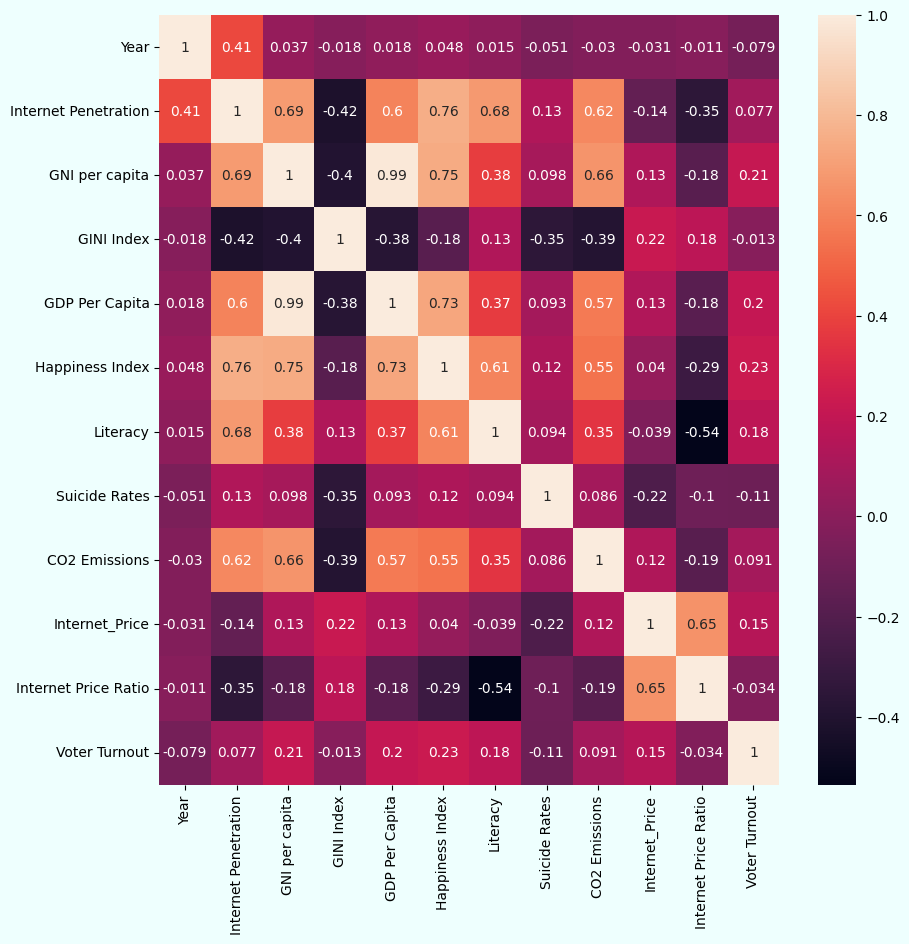

In [6]:
plt.figure(figsize=(10, 10))
# We create a correlation heatmap for the quantitative data in our dataset
numeric_df = df.select_dtypes(include = "number")
correlation_matrix = numeric_df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

To ensure the model's functionality, complete data is essential. However, due to numerous missing metrics across various countries and years (e.g., approximately 900 values for GINI Index), we opted for imputation methods. Our strategy involved backfilling for initial missing values in a country's early years, forward-filling for missing last values, and employing interpolation for gaps within available data (e.g., missing values between 2012 and 2016). Importantly, we refrained from using data from other countries to fill gaps, so if there were no values available for any year within a specific country we would eventually drop that country from the analysis.

In [7]:
df.describe()

,Year,Internet Penetration,GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
count,2687.000000,2308.000000,2412.000000,884.000000,2472.000000,1484.000000,486.000000,1832.000000,2092.000000,1014.000000,1010.000000,580.000000
mean,2016.383699,50.272237,13843.457711,36.281109,16094.757307,5.433430,84.559205,10.147926,4.153067,38.866199,0.940395,65.232000
std,3.968388,30.179557,18794.018564,7.413993,25647.678350,1.123804,18.176748,8.916781,5.033023,29.112067,3.862910,16.239183
min,2010.000000,0.000000,210.000000,23.200000,216.827417,1.859000,22.311550,0.000000,0.025112,3.303739,0.034745,11.220000
25%,2013.000000,22.158186,1970.000000,30.700000,1979.991808,4.574750,77.382500,4.900000,0.675681,21.345510,0.102620,53.657500
50%,2016.000000,52.637869,5645.000000,35.200000,5965.291551,5.410000,93.053776,7.900000,2.535054,33.525471,0.263931,66.095000
75%,2020.000000,77.780427,16385.000000,40.925000,18133.907114,6.253500,96.962358,12.700000,5.777704,49.085861,0.626980,76.792500
max,2023.000000,100.000000,105070.000000,63.400000,234317.084818,7.842000,100.000000,92.600000,39.582140,377.906977,76.250000,99.690000


In [8]:
df_filled = df.copy()

In [9]:
grouped = df_filled.groupby('Country')

# Use linear interpolation to impute missing values
columns_to_fill = ['GNI per capita', 'GINI Index', 'Internet Penetration', 'GDP Per Capita', 'Happiness Index', 'Literacy', 'Suicide Rates', "CO2 Emissions", "Internet_Price", "Voter Turnout"]

for country, country_df in grouped:
    for column in columns_to_fill:
        country_df[column] = country_df[column].interpolate(method='linear', limit_area='inside').fillna(method='ffill').fillna(method='bfill')
        df_filled.loc[df_filled['Country'] == country, column] = country_df[column]
df_filled

/var/folders/v4/fzvn3vnd4jg427pq437v42j80000gn/T/ipykernel_81167/50617516.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_df[column] = country_df[column].interpolate(method='linear', limit_area='inside').fillna(method='ffill').fillna(method='bfill')


,Country,Region,ISO,Year,Internet Penetration,GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,4.0400,31.448851,4.3,0.304230,155.761603,NaN,35.14000
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,4.0400,31.448851,4.1,0.408965,155.761603,NaN,36.40125
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,4.0400,32.030570,4.0,0.335061,155.761603,NaN,37.66250
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.0400,32.612289,4.0,0.298088,155.761603,NaN,38.92375
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,3.8075,33.194008,3.9,0.283692,155.761603,NaN,40.18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,99.700000,39570.0,NaN,43233.489094,6.1060,96.457542,2.9,21.169610,22.040382,NaN,59.27000
2683,Monaco,Europe,MCO,2023,86.095486,NaN,NaN,234317.084818,NaN,NaN,NaN,NaN,NaN,NaN,57.26000
2684,Oman,Arab States,OMN,2023,96.380075,20150.0,NaN,25056.794861,6.8530,97.339058,4.9,15.636201,81.805935,NaN,65.85000
2685,Timor-Leste,Asia & Pacific,TLS,2023,39.451312,1970.0,28.7,2358.409054,NaN,69.900002,3.7,0.343155,NaN,NaN,79.28000


In [10]:
# Check for remaining null value counts
null_counts = df_filled.isnull().sum()
null_counts

Country                    0
Region                     0
ISO                        0
Year                       0
Internet Penetration       0
GNI per capita            56
GINI Index               553
GDP Per Capita            29
Happiness Index          477
Literacy                 727
Suicide Rates            162
CO2 Emissions             70
Internet_Price           987
Internet Price Ratio    1677
Voter Turnout            189
dtype: int64

We still have a number of values missing and this is where we never had any data for that country for that metric through out the years.

In [11]:
columns_to_check = [
    'Internet Penetration', 'GNI per capita', 'GINI Index',
    'GDP Per Capita', 'Happiness Index', 'Literacy', 'Suicide Rates', 'CO2 Emissions', "Internet_Price",
    "Voter Turnout"
]

filtered_data = df_filled[columns_to_check]
# Check fkr further null data in the specified columns
missing_count_by_country = filtered_data.isnull().groupby(df_filled['Country']).sum()
missing_count_by_country.columns = [f'Missing_{col}' for col in columns_to_check]

missing_count_by_country[missing_count_by_country["Missing_GINI Index"]>0]

,Missing_Internet Penetration,Missing_GNI per capita,Missing_GINI Index,Missing_GDP Per Capita,Missing_Happiness Index,Missing_Literacy,Missing_Suicide Rates,Missing_CO2 Emissions,Missing_Internet_Price,Missing_Voter Turnout
Country,,,,,,,,,,
Afghanistan,0,0,14,0,0,0,0,0,0,0
Andorra,0,0,14,0,14,14,14,0,14,0
Antigua and Barbuda,0,0,14,0,14,14,0,0,14,0
Azerbaijan,0,0,13,0,0,0,0,0,0,0
Bahamas,0,0,13,0,13,13,0,0,0,0
Bahrain,0,0,14,0,0,0,0,0,0,0
Barbados,0,0,13,0,13,13,0,0,13,0
Belize,0,0,13,0,0,13,0,0,13,0
Brunei Darussalam,0,0,13,0,13,0,0,0,0,13


After analyzing the missing values in the dataframe, variables like Missing_Literacy and Missing_Internet_Price show a notable number of NaN entries. After trialing many model scenarios involving different combinations and number of features, we pursued two options for modeling:
- Option 1: Internet Penetration, Happiness Index, CO2 Emissions, Voter Turnout and Literacy
- Option 2: Internet Penetration, Happiness Index, CO2 Emissions and Voter Turnout

The outcome variables will be GDP per captia.

Why other features were dropped:
- GNI per capita has far too high correlation with GDP to be used within a model (99% as seen on correlation heatmap above)
- GINI Index - always showed with an insignificant p value on various models tried
- Suicide Rates - similarly insignificant p value on various models tried
- Internet Price - the individual analysis of this variable supports inconclusive effect so we don;t wish to keep this influence in.
- Literacy Rate - there are quite a lot of null data which couldn't be inputed as it didn't exist for quite a few countries and so wanted to try an option with dropping this feature rather than dropping rows with empty inputs.

In [12]:
# Option 1
columns_to_clean_v1 = [
    'Internet Penetration', 'GDP Per Capita', 'Happiness Index', 'CO2 Emissions',
    "Voter Turnout", "Literacy"
]

# Option 2
columns_to_clean_v2 = [
    'Internet Penetration', 'GDP Per Capita', 'Happiness Index', 'CO2 Emissions',
    "Voter Turnout"
]

model_data_v1 = df_filled.dropna(subset=columns_to_clean_v1)
model_data_v2 = df_filled.dropna(subset=columns_to_clean_v2)

In [13]:
# Printing the dimensions of the dataframes
print("Dataset for option 1: ", model_data_v1.shape)
print("Dataset for option 2: ", model_data_v2.shape)


Dataset for option 1:  (1655, 15)
Dataset for option 2:  (2102, 15)


# Modeling <a name="modeling"></a>
Running a regression model with the two datasets

Story is running a regression model to predict the GDP of the country and see what part Internet plays in that in the pressence of some of the other metrics

## Model Option 1 - 5 features

In [14]:
# Create ML model
# Define the features and the target variable for the model
features = ['Internet Penetration', 'Happiness Index', 'Voter Turnout', 'CO2 Emissions',
    "Literacy"]
target = 'GDP Per Capita'

X = model_data_v1[features] # Independent variables
y = model_data_v1[target]   # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardising the variables as GDP vs a % metric are very different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a linear regression model
model = LinearRegression()

# training model
model.fit(X_train_scaled, y_train)

# testing model
y_pred = model.predict(X_test_scaled)

# Evaluate model efficiency
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_

train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f"Training R^2 score: {train_score:.4f}")
print(f"Test R^2 score: {test_score:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(coefficients)
print(f"Intercept: {intercept:.4f}")

Training R^2 score: 0.6552
Test R^2 score: 0.6470
Mean Squared Error: 62110668.2917
                Feature  Coefficient
0  Internet Penetration  2370.985969
1       Happiness Index  2385.646961
2         Voter Turnout  1125.986231
3         CO2 Emissions  6087.869568
4              Literacy -1127.183456
Intercept: 7512.8626


The detailed summary table generated by the statsmodels library provides valuable insights. The following summary enhances the depth of our model assessment:

In [15]:
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled).fit()
print(model.summary())

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.params[1:]})
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:         GDP Per Capita   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.34e-301
Time:                        14:12:35   Log-Likelihood:                -13469.
No. Observations:                1324   AIC:                         2.695e+04
Df Residuals:                    1318   BIC:                         2.698e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7512.8626    174.484     43.058      0.0

Having completed prior groundwork (running many different model scenarios) to assess relevant predictors, we now see that all features have highly significant p-values which suggests their substantial relevance in predicting the outcome. CO2 Emissions, notably showing the strongest relationship, positively correlates with the outcome, aligning intuitively as higher CO2 Emissions correspond with higher industry and business activity and hence higher GDP. Following closely are the Happiness Index and Internet Penetration, both demonstrating similarly scaled positive relationships with GDP. This insight can potentially influence stakeholders by highlighting the key drivers that contribute significantly to economic growth, guiding potential areas for investment or policy considerations.

Curiously, Literacy has a negative relationship with GDP and while we will not explore this further in this project, this is certainly a very curious finding which would require further exploration. In some sense, there is an intuative thread to pull here given education is not a profit based business (leaving aside private education institutions which serve a small privileged subset of a country) but rather a long term investment in the future of a society.

/var/folders/v4/fzvn3vnd4jg427pq437v42j80000gn/T/ipykernel_81167/2532782148.py:20: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x='Coefficient', y='Feature', data=coefficients, ax=axes[1, 0], hue='Feature', palette=color_list, legend=False)


Text(0, 0.5, 'Frequency')

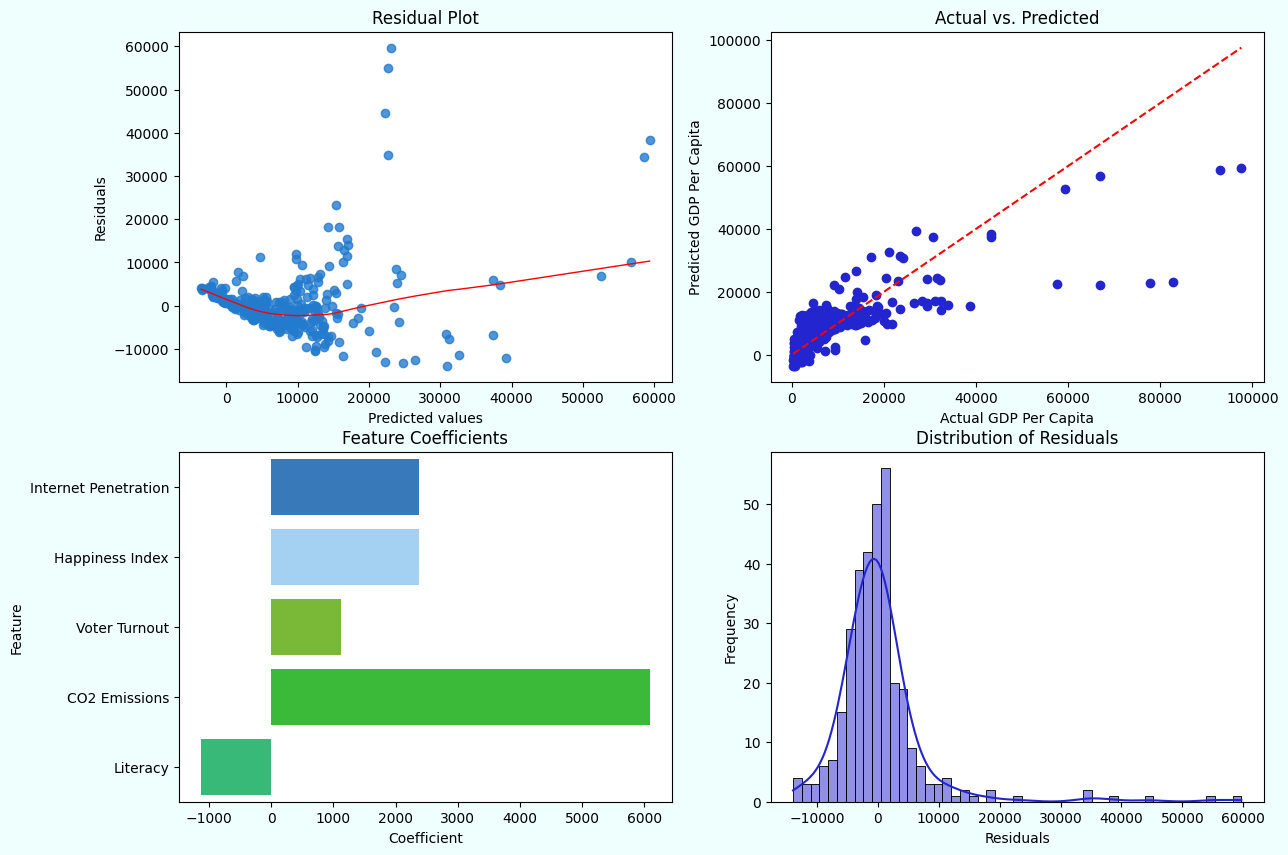

In [16]:
# Calculate residuals
residuals = y_test - y_pred

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Residual Plot
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot')
axes[0, 0].set_xlabel('Predicted values')
axes[0, 0].set_ylabel('Residuals')

# Actual vs. Predicted Scatterplot
axes[0, 1].scatter(y_test, y_pred, color=color_list[-1])
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted')
axes[0, 1].set_xlabel('Actual GDP Per Capita')
axes[0, 1].set_ylabel('Predicted GDP Per Capita')

# Coefficient bar chart
sns.barplot(x='Coefficient', y='Feature', data=coefficients, ax=axes[1, 0], hue='Feature', palette=color_list, legend=False)
axes[1, 0].set_title('Feature Coefficients')
axes[1, 0].set_xlabel('Coefficient')
axes[1, 0].set_ylabel('Feature')

# Distribution of errors
sns.histplot(residuals, kde=True, ax=axes[1, 1], color=color_list[6])
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')

Looking at the plots, the residual plot shows a notable positive skew rather than being evenly dispersed around the y-axis zero. This suggests the model tends to underestimate certain GDP Per Capita values. Although most residuals align with a normal distribution, a lengthy positive tail in the distribution indicates a persistent trend of underestimation in higher GDP Per Capita observations. We will now try a log transformation of the outcome (GDP per capita) to try to minimise these issues as GDP is set to USD which causes massive variations between different markets and regions.

## Model Option 1 - 5 features - Log Transformation

In [17]:
features = ['Internet Penetration', 'Happiness Index', 'Voter Turnout', 'CO2 Emissions', 'Literacy']
original_target = 'GDP Per Capita'

X = model_data_v1[features]
y = model_data_v1[original_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the variables as they are quite different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logarithmic transformation on the GDP target variable
transformed_y_train = np.log(y_train)
transformed_y_test = np.log(y_test)

# Model fitting and testing
model_log = LinearRegression()
model_log.fit(X_train_scaled, transformed_y_train)
y_pred_log = np.exp(model_log.predict(X_test_scaled))

# Outcome stats
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)
train_score_log = model_log.score(X_train_scaled, transformed_y_train)
test_score_log = model_log.score(X_test_scaled, transformed_y_test)

print("\nModel with Log Transformation Evaluation:")
print(f"Training R^2 score: {train_score_log:.4f}")
print(f"Test R^2 score: {test_score_log:.4f}")
print(f"Mean Squared Error: {mse_log:.4f}")

# Coefficients
coefficients_log = pd.DataFrame({'Feature': features, 'Coefficient': model_log.coef_})
coefficients_log



Model with Log Transformation Evaluation:
Training R^2 score: 0.8125
Test R^2 score: 0.7867
Mean Squared Error: 71333751.3785


,Feature,Coefficient
0,Internet Penetration,0.439261
1,Happiness Index,0.364530
2,Voter Turnout,0.006983
3,CO2 Emissions,0.285415
4,Literacy,0.274568


In [18]:
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(transformed_y_train, X_train_scaled).fit()
print(model.summary())

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.params[1:]})
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:         GDP Per Capita   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1142.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:12:36   Log-Likelihood:                -1066.0
No. Observations:                1324   AIC:                             2144.
Df Residuals:                    1318   BIC:                             2175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1764      0.015    548.408      0.0

/var/folders/v4/fzvn3vnd4jg427pq437v42j80000gn/T/ipykernel_81167/2645398817.py:19: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x='Coefficient', y='Feature', data=coefficients_log, ax=axes[1, 0], hue='Feature', palette=color_list, legend=False)


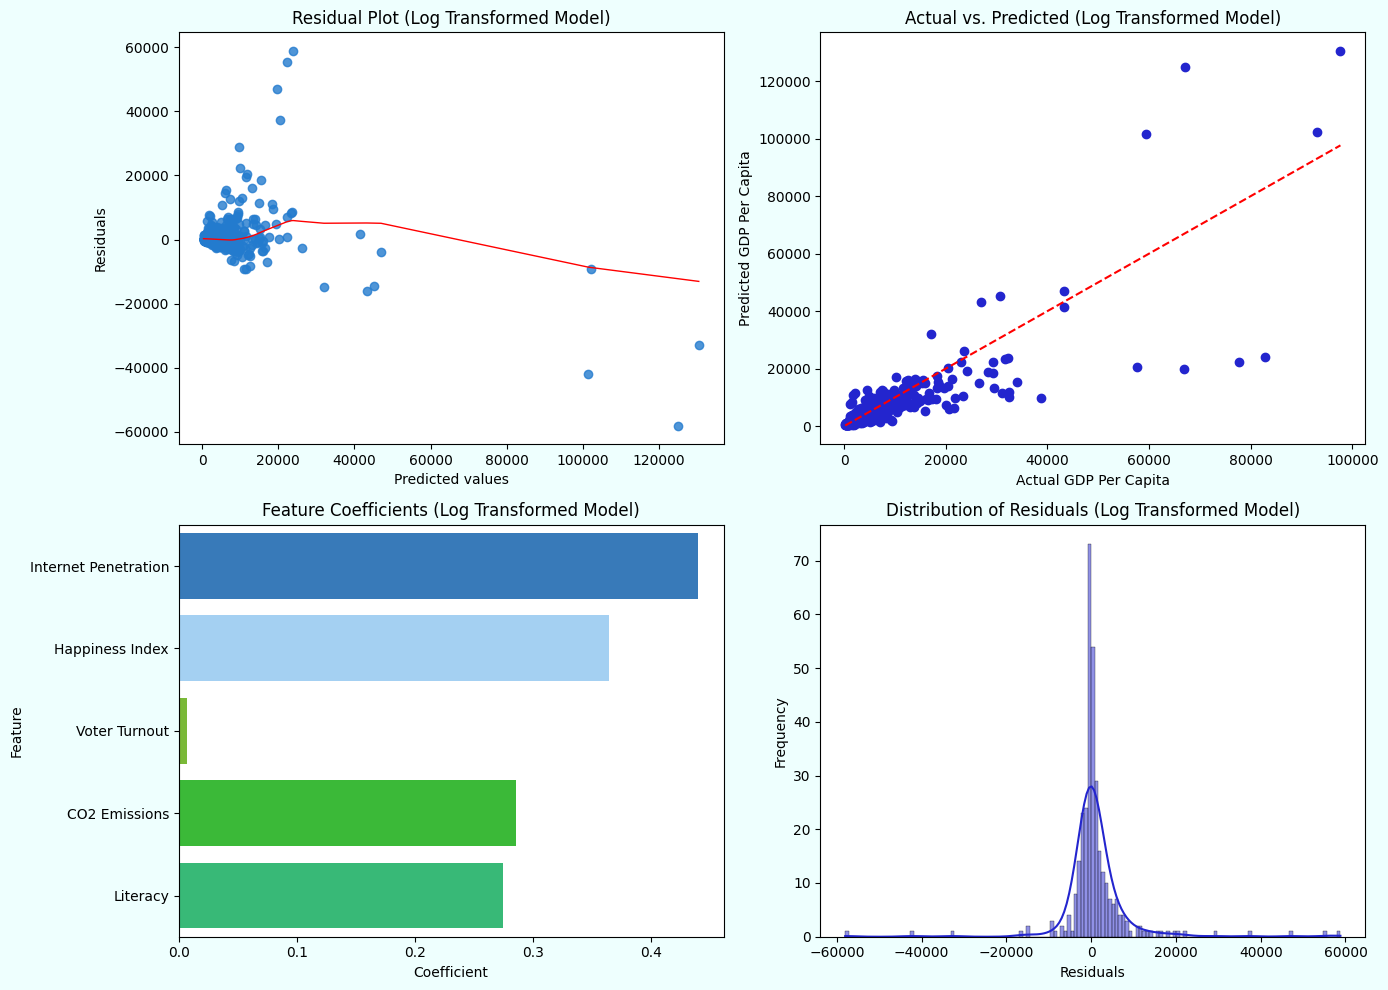

In [19]:
residuals_log = np.exp(transformed_y_test) - y_pred_log

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Residual Plot
sns.regplot(x=y_pred_log, y=residuals_log, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot (Log Transformed Model)')
axes[0, 0].set_xlabel('Predicted values')
axes[0, 0].set_ylabel('Residuals')

# Actual vs. Predicted Scatterplot
axes[0, 1].scatter(y_test, y_pred_log, color=color_list[-1])
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted (Log Transformed Model)')
axes[0, 1].set_xlabel('Actual GDP Per Capita')
axes[0, 1].set_ylabel('Predicted GDP Per Capita')

# Coefficient bar chart
sns.barplot(x='Coefficient', y='Feature', data=coefficients_log, ax=axes[1, 0], hue='Feature', palette=color_list, legend=False)
axes[1, 0].set_title('Feature Coefficients (Log Transformed Model)')
axes[1, 0].set_xlabel('Coefficient')
axes[1, 0].set_ylabel('Feature')

# Distribution of errors
sns.histplot(residuals_log, kde=True, ax=axes[1, 1], color=color_list[6])
axes[1, 1].set_title('Distribution of Residuals (Log Transformed Model)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Ok looking at these results now, the second model has a much higher R-squared value for both the training and testing model (81% and 79%) compared to the first (66% and 65%), indicating that the transformation done in the second model helped improve the amount of variance explained in target variable. However now we're seeing that variable "Voter Turnout" appears to be insignificant in the second model, suggesting that it may not contribute significantly to predicting GDP Per Capita in this context. The other variables, namely Internet Penetration, Happiness Index, CO2 Emissions, and Literacy, remain statistically significant across both models.

We will now try the the transformed model but removing Voter Turnout.

## Model Option 1 - 4 features - Log Transformation

In [20]:
features = ['Internet Penetration', 'Happiness Index', 'CO2 Emissions', 'Literacy']
original_target = 'GDP Per Capita'

X = model_data_v1[features]
y = model_data_v1[original_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the variables as they are quite different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logarithmic transformation on the GDP target variable
transformed_y_train = np.log(y_train)
transformed_y_test = np.log(y_test)

# Model fitting and testing
model_log = LinearRegression()
model_log.fit(X_train_scaled, transformed_y_train)
y_pred_log = np.exp(model_log.predict(X_test_scaled))

# Outcome stats
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)
train_score_log = model_log.score(X_train_scaled, transformed_y_train)
test_score_log = model_log.score(X_test_scaled, transformed_y_test)

print("\nModel with Log Transformation Evaluation:")
print(f"Training R^2 score: {train_score_log:.4f}")
print(f"Test R^2 score: {test_score_log:.4f}")
print(f"Mean Squared Error: {mse_log:.4f}")

# Coefficients
coefficients_log = pd.DataFrame({'Feature': features, 'Coefficient': model_log.coef_})
coefficients_log



Model with Log Transformation Evaluation:
Training R^2 score: 0.8125
Test R^2 score: 0.7867
Mean Squared Error: 71685378.0685


,Feature,Coefficient
0,Internet Penetration,0.437263
1,Happiness Index,0.365869
2,CO2 Emissions,0.285363
3,Literacy,0.276407


In [21]:
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(transformed_y_train, X_train_scaled).fit()
print(model.summary())

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.params[1:]})
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:         GDP Per Capita   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1429.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:12:37   Log-Likelihood:                -1066.1
No. Observations:                1324   AIC:                             2142.
Df Residuals:                    1319   BIC:                             2168.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1764      0.015    548.574      0.0

/var/folders/v4/fzvn3vnd4jg427pq437v42j80000gn/T/ipykernel_81167/799539896.py:19: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.barplot(x='Coefficient', y='Feature', data=coefficients_log, ax=axes[1, 0], hue='Feature', palette=color_list, legend=False)


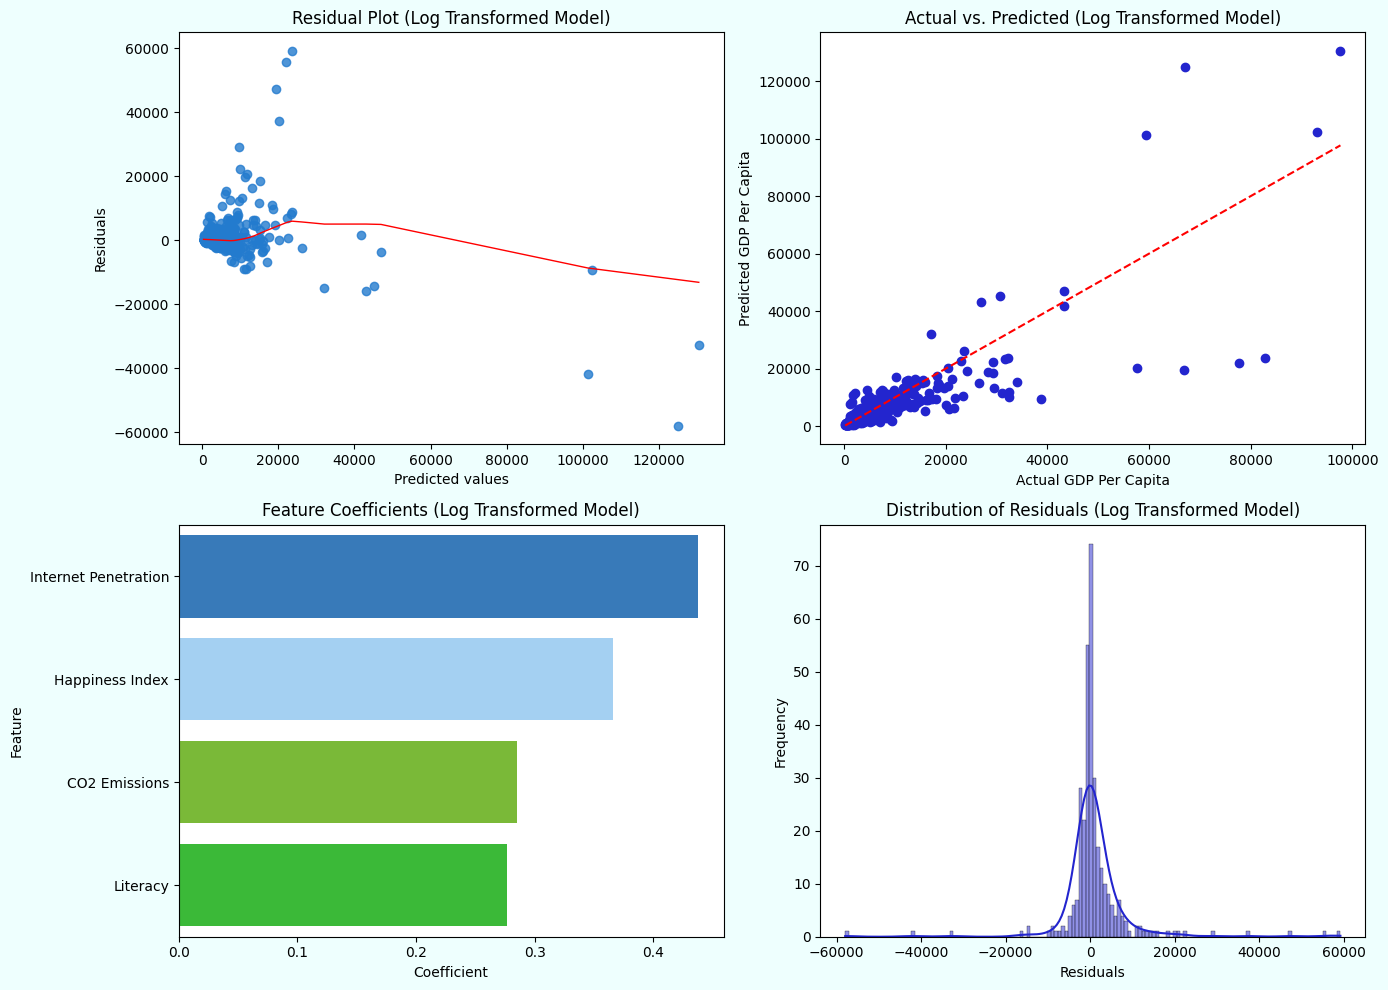

In [22]:
residuals_log = np.exp(transformed_y_test) - y_pred_log

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Residual Plot
sns.regplot(x=y_pred_log, y=residuals_log, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot (Log Transformed Model)')
axes[0, 0].set_xlabel('Predicted values')
axes[0, 0].set_ylabel('Residuals')

# Actual vs. Predicted Scatterplot
axes[0, 1].scatter(y_test, y_pred_log, color=color_list[-1])
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted (Log Transformed Model)')
axes[0, 1].set_xlabel('Actual GDP Per Capita')
axes[0, 1].set_ylabel('Predicted GDP Per Capita')

# Coefficient bar chart
sns.barplot(x='Coefficient', y='Feature', data=coefficients_log, ax=axes[1, 0], hue='Feature', palette=color_list, legend=False)
axes[1, 0].set_title('Feature Coefficients (Log Transformed Model)')
axes[1, 0].set_xlabel('Coefficient')
axes[1, 0].set_ylabel('Feature')

# Distribution of errors
sns.histplot(residuals_log, kde=True, ax=axes[1, 1], color=color_list[6])
axes[1, 1].set_title('Distribution of Residuals (Log Transformed Model)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

And finally after removing the insignificant feature (Voter Turnout), we can see that:
- R-squared: Model 2 explains 81% of the variance in the GDP outcome variable compared to Model 1 which explains 65%, suggesting model 2 does a better job at capturing the variance.
- AIC/BIC: Model 2 maintains significantly lower AIC and BIC values, indicating a better trade-off between goodness-of-fit and model complexity.
- Residuals appear to now mostly center the 0 axis wtih a more random positive and negative skew on either side, although of course still not perfect and might have trouble with some outliers

Given the transformation applied to the target variable in Model 2, we can't directly compare the coefficients.

In conclusion, despite the challenges in directly comparing coefficients due to the transformation, Model 2 still appears superior based on its higher R-squared and lower AIC/BIC values, indicating a better-performing and less complex model for representing GDP Per Capita.

## Model Option 2 - 3 Features (Without Literacy and Voter Turnout)

We will try this option right away with a log transformation given that was the better outcome in Model Option 1 section and without Voter Turnout as well:

In [23]:
features = ['Internet Penetration', 'Happiness Index', 'CO2 Emissions']
target = 'GDP Per Capita'

X = model_data_v2[features]
y = model_data_v2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the variables as they are quite different scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logarithmic transformation on the GDP target variable
transformed_y_train = np.log(y_train)
transformed_y_test = np.log(y_test)

# Model fitting and testing
model_log = LinearRegression()
model_log.fit(X_train_scaled, transformed_y_train)
y_pred_log = np.exp(model_log.predict(X_test_scaled))

# Outcome stats
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)
train_score_log = model_log.score(X_train_scaled, transformed_y_train)
test_score_log = model_log.score(X_test_scaled, transformed_y_test)

print("\nModel with Log Transformation Evaluation:")
print(f"Training R^2 score: {train_score_log:.4f}")
print(f"Test R^2 score: {test_score_log:.4f}")
print(f"Mean Squared Error: {mse_log:.4f}")

# Coefficients
coefficients_log = pd.DataFrame({'Feature': features, 'Coefficient': model_log.coef_})
coefficients_log



Model with Log Transformation Evaluation:
Training R^2 score: 0.8557
Test R^2 score: 0.8456
Mean Squared Error: 168592940.8060


,Feature,Coefficient
0,Internet Penetration,0.618339
1,Happiness Index,0.616999
2,CO2 Emissions,0.315965


In [24]:
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(transformed_y_train, X_train_scaled).fit()
print(model.summary())

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.params[1:]})
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:         GDP Per Capita   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     3315.
Date:                Sun, 17 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:12:38   Log-Likelihood:                -1407.7
No. Observations:                1681   AIC:                             2823.
Df Residuals:                    1677   BIC:                             2845.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6494      0.014    633.590      0.0

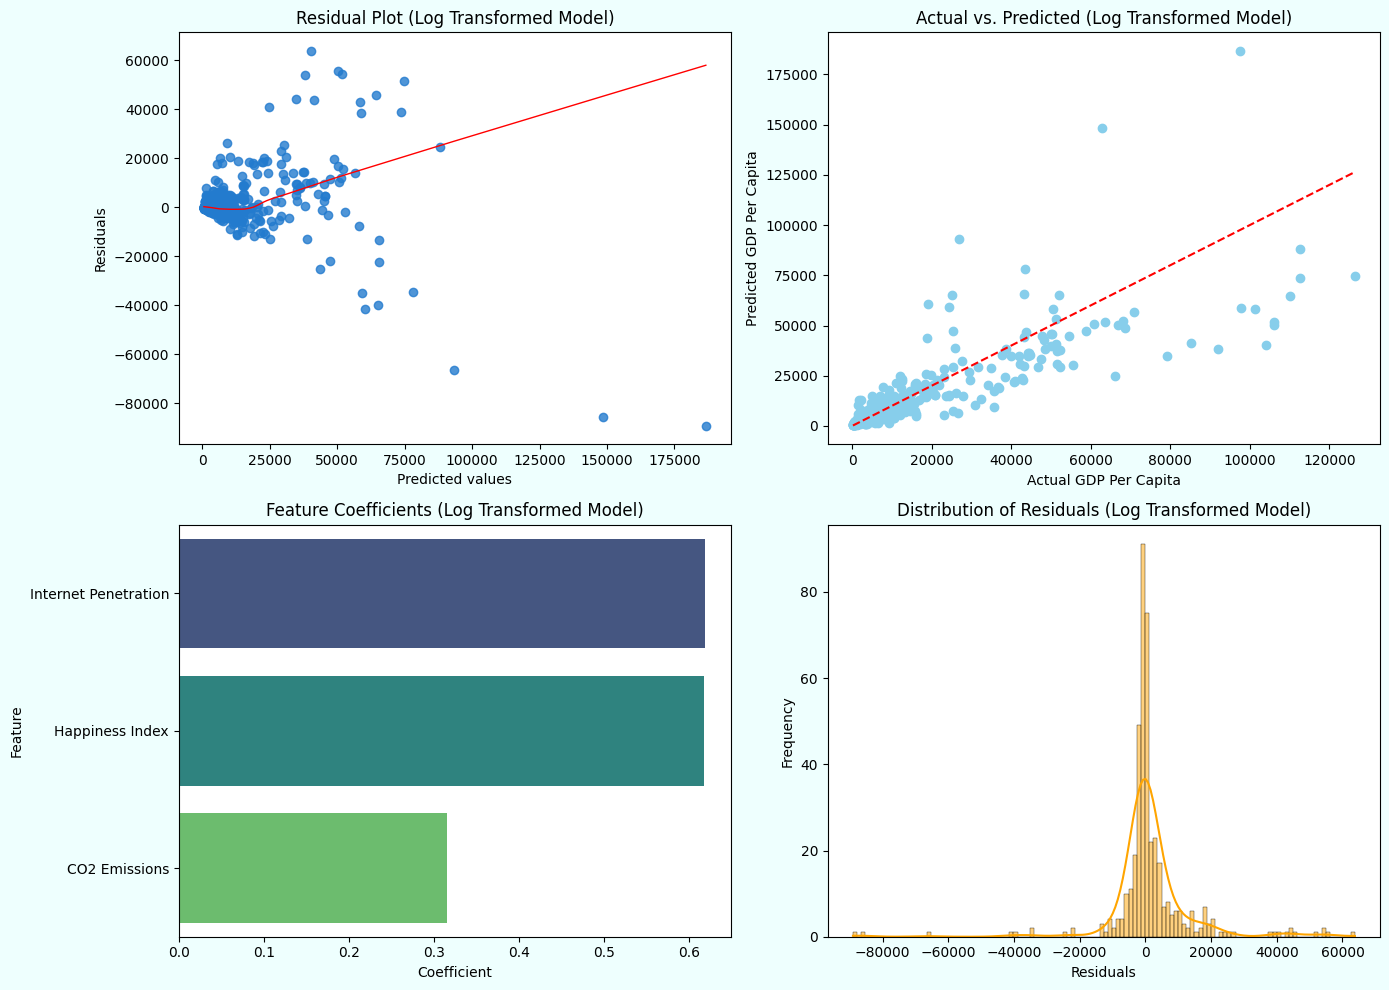

In [25]:
residuals_log = np.exp(transformed_y_test) - y_pred_log

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Residual Plot
sns.regplot(x=y_pred_log, y=residuals_log, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0, 0])
axes[0, 0].set_title('Residual Plot (Log Transformed Model)')
axes[0, 0].set_xlabel('Predicted values')
axes[0, 0].set_ylabel('Residuals')

# Actual vs. Predicted Scatterplot
axes[0, 1].scatter(y_test, y_pred_log, color='skyblue')
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted (Log Transformed Model)')
axes[0, 1].set_xlabel('Actual GDP Per Capita')
axes[0, 1].set_ylabel('Predicted GDP Per Capita')

# Coefficient bar chart
sns.barplot(x='Coefficient', y='Feature', data=coefficients_log, ax=axes[1, 0], hue='Feature', palette='viridis', legend=False)
axes[1, 0].set_title('Feature Coefficients (Log Transformed Model)')
axes[1, 0].set_xlabel('Coefficient')
axes[1, 0].set_ylabel('Feature')

# Distribution of errors
sns.histplot(residuals_log, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Residuals (Log Transformed Model)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

With this option we get a very similiar albiet slightly better R squared although the residuals begin to become negatively skewed in this case, and slightly higher AIC so given this we still maintain the preference for *Model Option 1 - 4 features - Log Transformation* as the best option for predicting GDP per capita with Internet Penetration Rates, Happines Index, Literacy and CO2 Emissions

# Conclusion <a name="conclusion"></a>

Despite these metrics not being collected with a predictive model in mind, we were able to build a model which explains 82% of the variance of the outcome, GDP per capita, with the following predictors in order of importance:
- Internet Penetration Rates
- Happiness Index
- CO2 Emissions
- Literacy

Each of these metrics could be seen as proxies representing categories more directly linked to GDP per capita. For instance:
- Internet Penetration may reflect entrepreneurial opportunities at an individual level and access to the global economy, contributing significantly to economic growth.
- Happiness Index might relate to the overall quality of life, societal well-being, and potentially influences productivity and innovation, thereby impacting economic success.
- CO2 Emissions can indicate substantial industrial and business development within a country, often correlating with higher GDP due to increased economic activity and production.
- Literacy rates are fundamental for human capital development, influencing workforce skills, education, and productivity, all of which are essential drivers of economic growth.

On the technical side further exploration into the outliers causing patterns in the residuals and poorer predictions for higher GDP per capita as well as inclusion of additional or more relevant factors would certainly enhance the predictive accuracy of the model.

